In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.signal import convolve2d
from scipy.optimize import curve_fit


In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

In [215]:
def gaussian_2d(coor, x0, y0, sigma_x, sigma_y, amplitude, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2))
    )

def double_gaussian_2d(coor, x0, y0, x1, y1, sigma_x0, sigma_y0, sigma_x1, sigma_y1, amplitude0, amplitude1, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude0 * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x0 ** 2) + ((y - y0) ** 2) / (2 * sigma_y0 ** 2))
    ) + amplitude1 * np.exp(
        -(((x - x1) ** 2) / (2 * sigma_x1 ** 2) + ((y - y1) ** 2) / (2 * sigma_y1 ** 2))
    )

## 100*100 Correlation Diagonal Hopping

### no drive, pgen=0.01

In [318]:
file_name = "../data/240627/240627_3_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

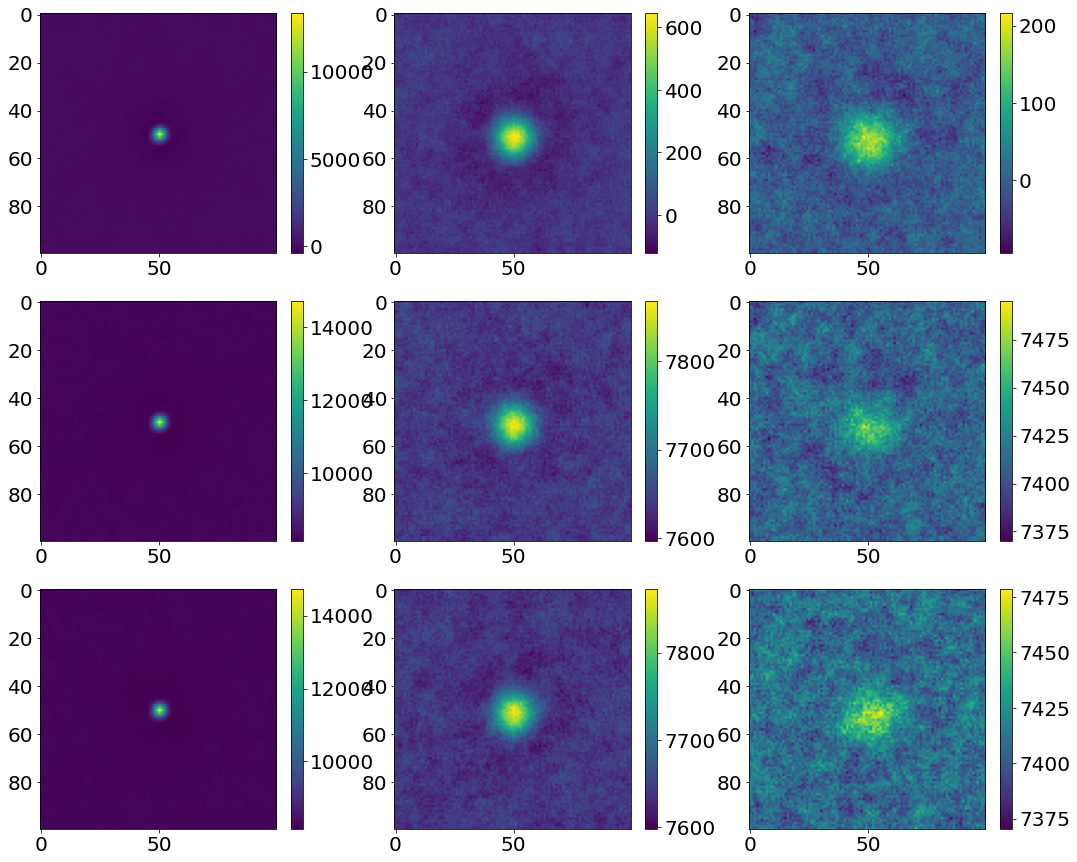

In [319]:
t1 = 4
t2 = 50
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

In [320]:
def gaussian_2d(coor, x0, y0, sigma_x, sigma_y, amplitude, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2))
    )

params_l = []
# for t in range(int(scoor.shape[-1]/2)):
for t in range(100):
    scoor_t = np.roll(scoor[:,:,t],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
    # Get the coordinates of the pixels
    x = np.arange(0, scoor_t.shape[1])
    y = np.arange(0, scoor_t.shape[0])
    x, y = np.meshgrid(x, y)

    # Flatten the arrays for fitting
    x = x.ravel()
    y = y.ravel()
    z = scoor_t.ravel()

    # Initial guess for the parameters
    initial_guess = (scoor_t.shape[1] / 2, scoor_t.shape[0] / 2, 1, 1, np.max(scoor_t), np.min(scoor_t))

    # Fit the data
    params, _ = curve_fit(gaussian_2d, (x, y), z, p0=initial_guess)

    # Extract the parameters
    x0, y0, sigma_x, sigma_y, amplitude, offset = params
    params_l.append(params)

params_l = np.array(params_l)
params_l.shape

/usr/local/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(100, 6)

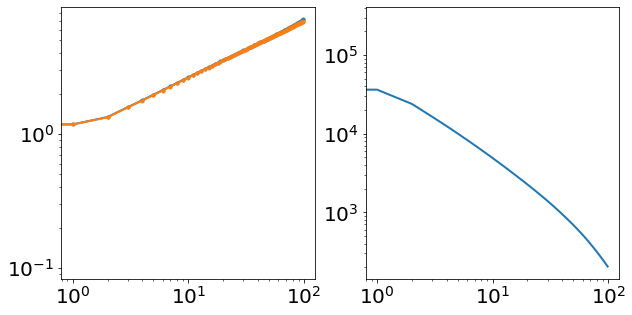

In [321]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot((params_l[:,2]+params_l[:,3])/2,'.-')
plt.plot(params_l[:,3],'.-')
# plt.ylim(1e0,1e1)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,2,2)
plt.plot(params_l[:,4])
plt.xscale('log')
plt.yscale('log')

In [325]:
tfit_l = np.arange(10,50,dtype=int)
m, b = np.polyfit(np.log(tfit_l), np.log((params_l[10:50,2]+params_l[10:50,3])/2), 1)
print("var exponents", m)
m, b = np.polyfit(np.log(tfit_l), np.log(params_l[10:50,4]), 1)
print("var exponents", m)

var exponents 0.417140984442502
var exponents -1.2224597215358863


In [ ]:
m, b = np.polyfit(tfit_l, params_l[:,0], 1)
pslope_l.append(m)
m, b = np.polyfit(tfit_l, params_l[:,2], 1)
mslope_l.append(m)
m, b = np.polyfit(np.log(tfit_l), np.log((params_l[:,4]+params_l[:,5])/2), 1)
pvar_exp_l.append(m)
pvar_const_l.append(b)
m, b = np.polyfit(np.log(tfit_l), np.log((params_l[:,6]+params_l[:,7])/2), 1)
mvar_exp_l.append(m)
mvar_const_l.append(b)
m, b = np.polyfit(np.log(tfit_l), np.log(params_l[:,8]), 1)
pamp_exp_l.append(m)
pamp_const_l.append(b)
m, b = np.polyfit(np.log(tfit_l), np.log(params_l[:,9]), 1)
mamp_exp_l.append(m)
mamp_const_l.append(b)

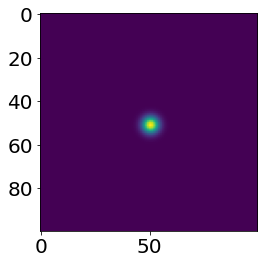

In [87]:
fitted_gaussian = gaussian_2d((x, y), *params).reshape(scoor_t.shape)
plt.imshow(fitted_gaussian)


### Drift, pdr=0.1, pgen=0.01

In [255]:
file_name = "../data/240627/240627_30_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

FileNotFoundError: ../data/240627/240627_30_pcoor_scanx.csv not found.

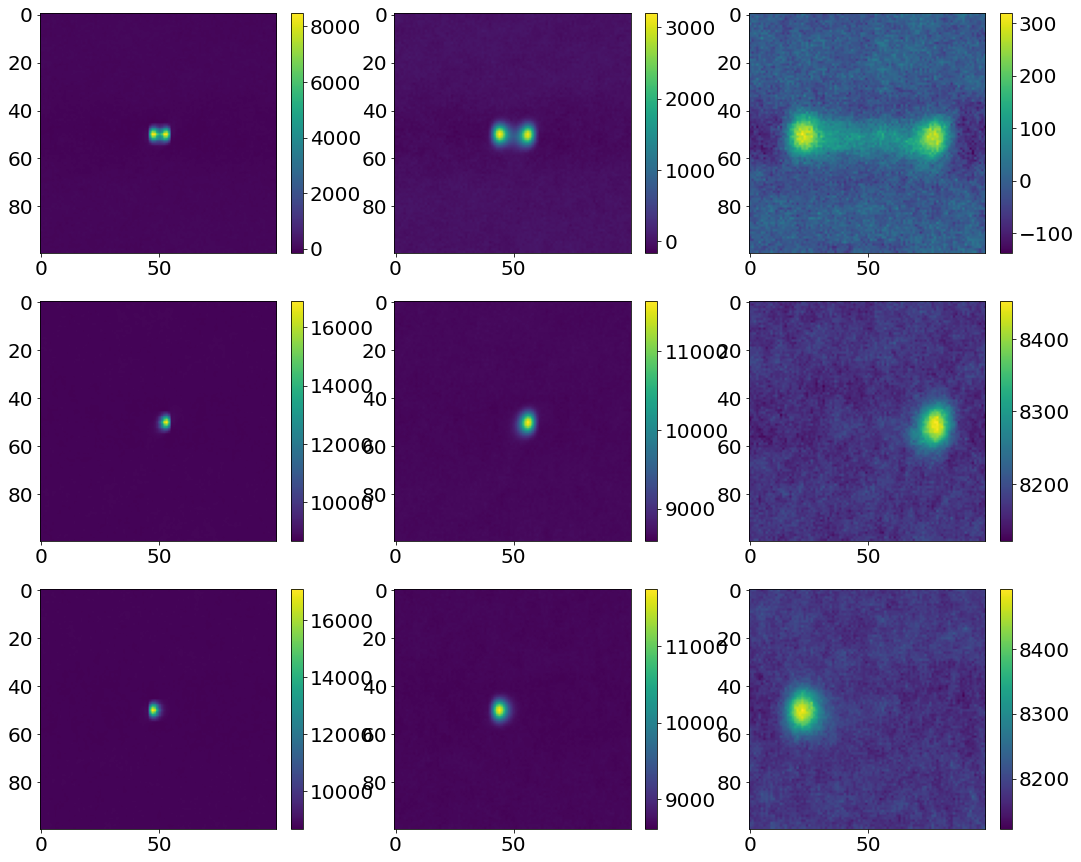

In [256]:
t1 = 4
t2 = 10
t3 = 50

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

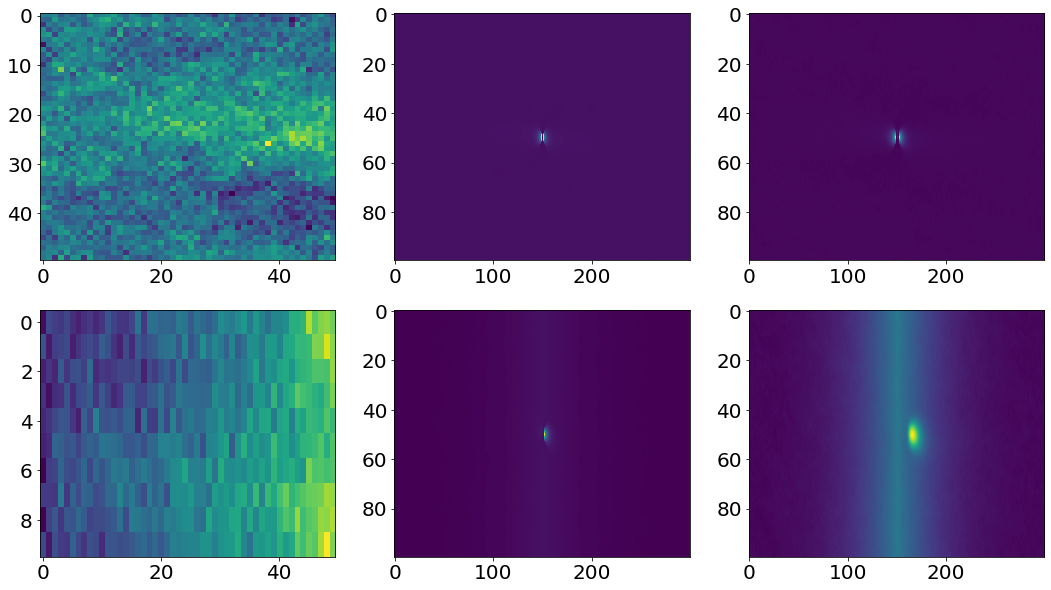

In [173]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
scoor_r = np.roll(scoor[:,0,:],(int(len(x_l)/2),int(len(t_l)/2)),(0,1))
plt.imshow(scoor_r[25:75,25:75],aspect='auto')
plt.subplot(2,3,2)
scoor_r = np.roll(scoor[:,1,:],(int(len(x_l)/2),int(len(t_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.subplot(2,3,3)
scoor_r = np.roll(scoor[:,2,:],(int(len(x_l)/2),int(len(t_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.subplot(2,3,4)
pcoor_r = np.roll(pcoor[:,0,:],(int(len(x_l)/2),int(len(t_l)/2)),(0,1))
plt.imshow(pcoor_r[5:15,25:75],aspect='auto')
plt.subplot(2,3,5)
pcoor_r = np.roll(pcoor[:,2,:],(int(len(x_l)/2),int(len(t_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.subplot(2,3,6)
pcoor_r = np.roll(pcoor[:,10,:],(int(len(x_l)/2),int(len(t_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')

In [262]:
def double_gaussian_2d(coor, x0, y0, x1, y1, sigma_x0, sigma_y0, sigma_x1, sigma_y1, amplitude0, amplitude1, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude0 * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x0 ** 2) + ((y - y0) ** 2) / (2 * sigma_y0 ** 2))
    ) + amplitude1 * np.exp(
        -(((x - x1) ** 2) / (2 * sigma_x1 ** 2) + ((y - y1) ** 2) / (2 * sigma_y1 ** 2))
    )

params_l = []
# for t in range(int(scoor.shape[-1]/2)):
for t in range(1,60):
    scoor_t = np.roll(scoor[:,:,t],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
    # Get the coordinates of the pixels
    x = np.arange(0, scoor_t.shape[1])
    y = np.arange(0, scoor_t.shape[0])
    x, y = np.meshgrid(x, y)

    # Flatten the arrays for fitting
    x = x.ravel()
    y = y.ravel()
    z = scoor_t.ravel()

    # Initial guess for the parameters
    initial_guess = (scoor_t.shape[1] / 2 - t/50*25, scoor_t.shape[0] / 2 ,
                     scoor_t.shape[1] / 2 + t/50*25, scoor_t.shape[0] / 2,  
                     1, 1, 
                     1, 1,
                     np.max(scoor_t), np.max(scoor_t), 
                     np.min(scoor_t)
                     )

    # Fit the data
    params, _ = curve_fit(double_gaussian_2d, (x, y), z, p0=initial_guess)

    # Extract the parameters
    params_l.append(params)

params_l = np.array(params_l)
params_l.shape


(59, 11)

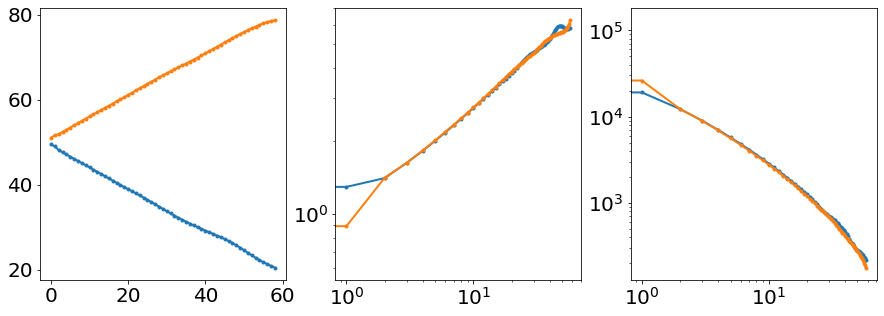

In [263]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(params_l[:,0],'.-')
plt.plot(params_l[:,2],'.-')
plt.subplot(1,3,2)
plt.plot((params_l[:,4]+params_l[:,5])/2,'.-')
plt.plot((params_l[:,6]+params_l[:,7])/2,'.-')
# plt.ylim(1e0,1e1)
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,3,3)
plt.plot(params_l[:,8],'.-')
plt.plot(params_l[:,9],'.-')
plt.xscale('log')
plt.yscale('log')

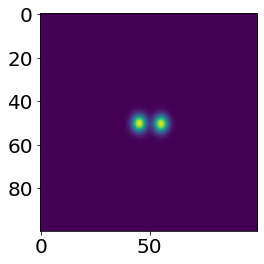

In [192]:
fitted_gaussian = double_gaussian_2d((x, y), *params).reshape(scoor_t.shape)
plt.imshow(fitted_gaussian)

### Scan drive
pdr=0.01*i, pgen=0.01, 10-20

In [291]:
np.arange(10,50,dtype=int)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

In [304]:
params_arr = []
tfit_l = np.arange(10,50,step=1,dtype=int)
idx_l = np.arange(4,11,step=1,dtype=int)
for i in idx_l:
    file_idx = 10+i
    file_name = "../data/240627/240627_%d_"%(file_idx)
    x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
    y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
    t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
    raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
    pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
    raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
    ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
    raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
    scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

    params_l = []
    # for t in range(int(scoor.shape[-1]/2)):
    for t in tfit_l:
    # for t in range(10,50):
        scoor_t = np.roll(scoor[:,:,int(t)],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
        # Get the coordinates of the pixels
        x = np.arange(0, scoor_t.shape[1])
        y = np.arange(0, scoor_t.shape[0])
        x, y = np.meshgrid(x, y)

        # Flatten the arrays for fitting
        x = x.ravel()
        y = y.ravel()
        z = scoor_t.ravel()

        # Initial guess for the parameters
        initial_guess = (scoor_t.shape[1] / 2 - t/500*i*25, scoor_t.shape[0] / 2 ,
                        scoor_t.shape[1] / 2 + t/500*i*25, scoor_t.shape[0] / 2,  
                        1, 1, 
                        1, 1,
                        np.max(scoor_t), np.max(scoor_t), 
                        np.min(scoor_t)
                        )

        # Fit the data
        params, _ = curve_fit(double_gaussian_2d, (x, y), z, p0=initial_guess)

        # Extract the parameters
        params_l.append(params)
    params_arr.append(params_l)

# params_arr = np.array(params_arr)
    

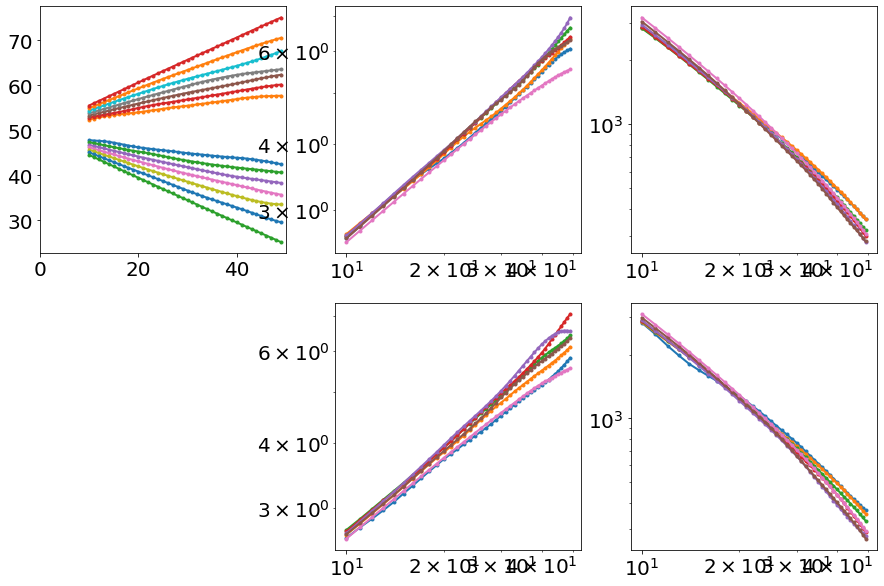

In [301]:
plt.figure(figsize=(15,10))
for params_temp_l in params_arr:
    params_l = np.array(params_temp_l)
    plt.subplot(2,3,1)
    plt.plot(tfit_l,params_l[:,0],'.-')
    plt.plot(tfit_l,params_l[:,2],'.-')
    plt.xlim([0,50])
    plt.subplot(2,3,2)
    plt.plot(tfit_l,(params_l[:,4]+params_l[:,5])/2,'.-')
    # plt.plot(np.arange(10,50),(params_l[:,6]+params_l[:,7])/2,'.-')
    # plt.ylim(1e0,1e1)
    plt.xscale('log')
    plt.yscale('log')

    plt.subplot(2,3,3)
    plt.plot(tfit_l,params_l[:,8],'.-')
    # plt.plot(np.arange(10,50),params_l[:,9],'.-')
    plt.xscale('log')
    plt.yscale('log')

    plt.subplot(2,3,5)
    # plt.plot(np.arange(10,50),(params_l[:,4]+params_l[:,5])/2,'.-')
    plt.plot(tfit_l,(params_l[:,6]+params_l[:,7])/2,'.-')
    # plt.ylim(1e0,1e1)
    plt.xscale('log')
    plt.yscale('log')

    plt.subplot(2,3,6)
    # plt.plot(np.arange(10,50),params_l[:,8],'.-')
    plt.plot(tfit_l,params_l[:,9],'.-')
    plt.xscale('log')
    plt.yscale('log')

In [302]:
pslope_l = []
mslope_l = []
pvar_exp_l = []
mvar_exp_l = []
pvar_const_l = []
mvar_const_l = []
pamp_exp_l = []
mamp_exp_l = []
pamp_const_l = []
mamp_const_l = []
for params_temp_l in params_arr:
    params_l = np.array(params_temp_l)
    m, b = np.polyfit(tfit_l, params_l[:,0], 1)
    pslope_l.append(m)
    m, b = np.polyfit(tfit_l, params_l[:,2], 1)
    mslope_l.append(m)
    m, b = np.polyfit(np.log(tfit_l), np.log((params_l[:,4]+params_l[:,5])/2), 1)
    pvar_exp_l.append(m)
    pvar_const_l.append(b)
    m, b = np.polyfit(np.log(tfit_l), np.log((params_l[:,6]+params_l[:,7])/2), 1)
    mvar_exp_l.append(m)
    mvar_const_l.append(b)
    m, b = np.polyfit(np.log(tfit_l), np.log(params_l[:,8]), 1)
    pamp_exp_l.append(m)
    pamp_const_l.append(b)
    m, b = np.polyfit(np.log(tfit_l), np.log(params_l[:,9]), 1)
    mamp_exp_l.append(m)
    mamp_const_l.append(b)

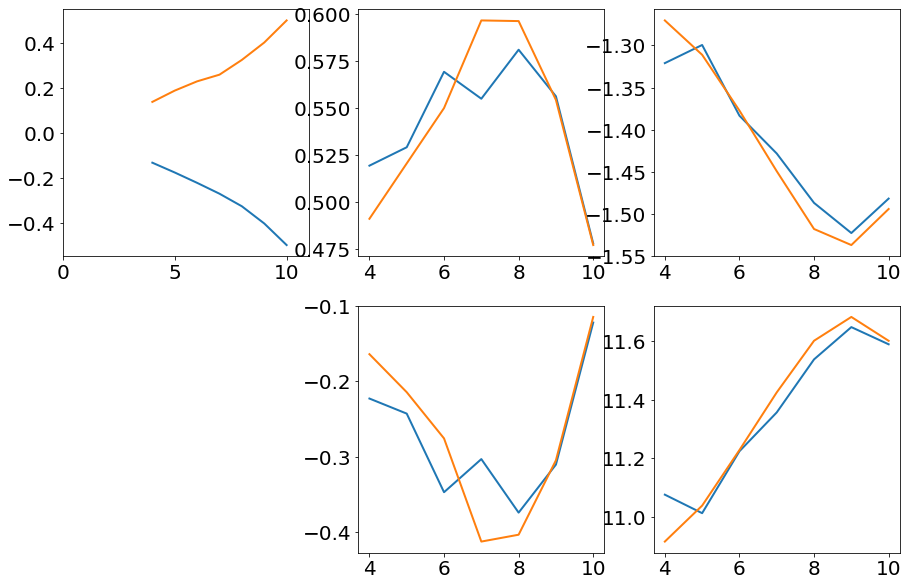

In [314]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.plot(idx_l,pslope_l)
plt.plot(idx_l,mslope_l)
plt.xlim([0,11])

plt.subplot(2,3,2)
plt.plot(idx_l,pvar_exp_l)
plt.plot(idx_l,mvar_exp_l)

plt.subplot(2,3,5)
plt.plot(idx_l,pvar_const_l)
plt.plot(idx_l,mvar_const_l)

plt.subplot(2,3,3)
plt.plot(idx_l,pamp_exp_l)
plt.plot(idx_l,mamp_exp_l)

plt.subplot(2,3,6)
plt.plot(idx_l,pamp_const_l)
plt.plot(idx_l,mamp_const_l)

In [283]:
params_arr

[]